## 활성화 함수
활성화 함수가 Nonlinear function 이어야 하는 이유는, 선형함수를 활성화 함수로 선택해서 계속해서 은닉층을 쌓았을때 계속해서 선형이 되고 1회 추가한 것이나 다름없기 때문

### sigmoid
sigmoid의 문제는 출력값이 0과 1에 가까워지면 그래프의 기울기가 완만해지기 때문에 역전파 과정에서 0에 가까운 값이 누적해서 곱해지고, 앞단에 기울기가 전달되지 않게 됨(Vanishing Gradient)

따라서 주로 sigmoid는 이진 분류를 위해서 *출력층*에서 사용



### Hyperbolic tangent function
입력값을 -1과 1사이 값으로 변환하여 sigmoid보다는 미분의 최댓값이 더 큼 (1 vs 0.25)

### ReLU / Leaky ReLU
relu는 입력값이 음수면 미분값도 0이 되고 회생이 어려워서 죽은 렐루라고한다. 이를 보완하기 위한 것이 Leaky ReLU. 그냥 max(0, x) 가 아닌 *새는 정도*에 해당하는 하이퍼파라미터 a를 준다. max(ax, x)

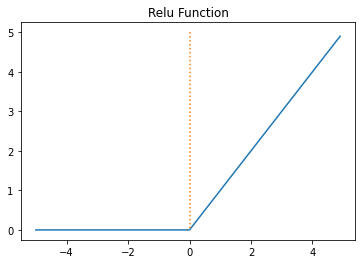

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def relu(x):
    return np.maximum(0, x)

x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)

plt.plot(x, y)
plt.plot([0,0],[5.0,0.0], ':')
plt.title('Relu Function')
plt.show()

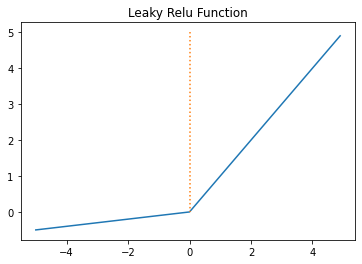

In [4]:
a = 0.1

def leaky_relu(x):
    return np.maximum(a*x, x)

x = np.arange(-5.0, 5.0, 0.1)
y = leaky_relu(x)

plt.plot(x, y)
plt.plot([0,0],[5.0,0.0], ':')
plt.title('Leaky Relu Function')
plt.show()

### Softmax function

은닉층에서는 ReLU(또는 ReLU 변형) 함수들을 사용하는 것이 일반적인 반면, 소프트맥스 함수는 시그모이드 함수처럼 출력층에서 주로 사용된다. 소프트 맥스는 다중 클래스 분류시 출력층에서 사용

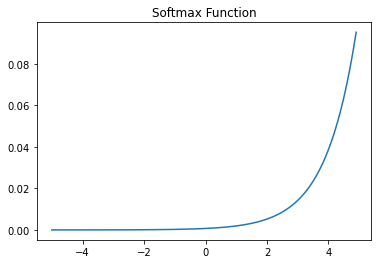

In [5]:
x = np.arange(-5.0, 5.0, 0.1) # -5.0부터 5.0까지 0.1 간격 생성
y = np.exp(x) / np.sum(np.exp(x))

plt.plot(x, y)
plt.title('Softmax Function')
plt.show()

#### Softmax 함수의 이해
<center><img src="https://wikidocs.net/images/page/35476/softmax1_final_final_ver.PNG"></center>

##### 1. 소프트맥스 함수의 입력으로 어떻게 바꿀까?
<center><img src="https://wikidocs.net/images/page/35476/softmaxbetween1and2.PNG"></center>
샘플 데이터 벡터를 소프트맥스 함수의 입력 벡터로 차원을 축소하는 방법은, 소프트맥스 함수의 입력 벡터 z의 차원수만큼 결과값이 나오도록 가중치 곱을 진행하면 된다.
위의 그림에서는 총 4x3=12개이며, 전부 다른 가중치를 가지고 학습 과정에서 점차적으로 오차를 최소화하는 가중치로 변경된다.

##### 2. 오차를 어떻게 구할까?

<center><img src="https://wikidocs.net/images/page/35476/softmax6_final_2ldz1s0.PNG"></center>
현재 풀고있는 샘플의 실제 값에 해당하는 클래스의 one-hot vector와 비교하여 오차를 구한다. 오차를 계산하기 위한 비용함수로는 크로스 엔트로피를 사용한다. 더 정확히는 편향 또한 업데이트의 대상.


##### 예측값을 구하는 과정
<center><img src="https://wikidocs.net/images/page/35476/softmax7.PNG"></center>
1개의 sample에 대해 소프트맥스 회귀에서 예측값을 구하는 과정을 벡터와 행렬 연산으로 표현한 그림

#### 수식

입력받은 k차원의 벡터에서 i번째 원소를 ${z_{i}}$, i번째 클래스가 정답일 확률을 ${p_{i}}$ 라고 할 때

$p_{i}=\frac{e^{z_{i}}}{\sum_{j=1}^{k} e^{z_{j}}}\ \ for\ i=1, 2, ... k$

*ex) k=3일 때*

$softmax(z)=[\frac{e^{z_{1}}}{\sum_{j=1}^{3} e^{z_{j}}}\ \frac{e^{z_{2}}}{\sum_{j=1}^{3} e^{z_{j}}}\ \frac{e^{z_{3}}}{\sum_{j=1}^{3} e^{z_{j}}}] = [p_{1}, p_{2}, p_{3}] = \hat{y} = \text{예측값}$

세 값은 각각의 클래스가 정답일 확률이며, 각각 0과 1사이의 값으로 총 합은 1이 된다.

*지수함수가 사용되는 이유?*

만약 입력값이 1.0, 1.0, 2.0 이라면 소프트 맥스 출력값은 0.25, 0.25, 0.5가 아닌 0.2, 0.2, 0.6 (반올림기준)이 되는데, exp(x)를 사용했기 때문이다. 지수함수가 사용되는 이유는 *미분이 가능하도록 하게 함*이며, 입력값 중 큰 값은 더 크게 작은 값은 더 작게 만들어 *입력벡터가 더 잘 구분되게 하기 위함*이다. 

#### 비용 함수 (Cost function)

크로스 엔트로피 함수의 수식은 아래와 같다. ${y_{j}}$는 실제값의 원핫벡터의 j번째 인덱스를 의미한다.

$cost = -\sum_{j=1}^{k}y_{j}\ log(p_{j})$

${p_{j}}$는 샘플 데이터가 $j$번째 클래스일 확률이며 만약 이 확률이 1이라면 y를 정확하게 예측한 경우가 되고, 식에 대입해보면 $-1log(1)=0$이 되기 때문에 결과적으로 크로스 엔트로피 함수 값은 0이 된다. 즉 해당 값을 최소화하는 방향으로 학습이 이루어지게 된다.

n개의 전체 데이터에 대한 평균을 구한다고 하면 최종 비용함수는 아래와 같다.

$cost = -\frac{1}{n} \sum_{i=1}^{n} \sum_{j=1}^{k}y_{j}^{(i)}\ log(p_{j}^{(i)})$

소프트맥스의 최종 cost function에서 k가 2라고 가정하면 결국 로지스틱 회귀의 비용 함수와 같아진다.

 



